# Анализ оттока клиентов телеком-сервиса

## Контекст
Компания — телеком-оператор.  
Цель анализа — выявить ключевые факторы, влияющие на отток клиентов (churn), и сформулировать рекомендации для бизнеса.


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [17]:
df = pd.read_csv('../data/raw/telecom_churn.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Обзор данных

Датасет содержит информацию о клиентах телеком-компании, их тарифах, подключённых услугах и факте оттока (Churn).

На первом этапе был проведён обзор структуры данных, типов признаков и наличия пропусков.


In [20]:
churn_rate = (df['Churn'] == 'Yes').mean()
churn_rate

np.float64(0.2653698707936959)

## Уровень оттока клиентов

Доля клиентов, прекративших использование сервиса, составляет **~26.5%**.

Для телеком-индустрии это достаточно высокий показатель, что указывает на необходимость детального анализа факторов оттока.


In [21]:
pd.crosstab(df['Contract'], df['Churn'], normalize='index')


Churn,No,Yes
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887305,0.112695
Two year,0.971681,0.028319


### Влияние типа контракта на отток

Клиенты с помесячным контрактом демонстрируют крайне высокий уровень оттока — **42.7%**.  
Для сравнения, клиенты с годовыми и двухгодовыми контрактами уходят значительно реже — **11.3%** и **2.8%** соответственно.

Тип контракта является одним из ключевых факторов, влияющих на удержание клиентов.


In [22]:
df.groupby('Churn')['MonthlyCharges'].mean()


Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64

In [23]:
df.groupby('Churn')['tenure'].mean()


Churn
No     37.569965
Yes    17.979133
Name: tenure, dtype: float64

### Финансовые и поведенческие различия клиентов

Клиенты, покидающие сервис, в среднем платят больше за услуги — **74.4** против **61.3** у удержанных клиентов.

Кроме того, срок пользования услугами у ушедших клиентов почти в два раза меньше — **18 месяцев** против **37.6 месяцев**.

Это указывает на то, что новые клиенты с более высоким ежемесячным платежом находятся в зоне повышенного риска оттока.


## Рекомендации по снижению оттока

1. Стимулировать переход клиентов с помесячных контрактов на годовые:
   - скидки при продлении
   - бонусы за длительное использование

2. Сфокусироваться на удержании новых клиентов:
   - специальные onboarding-офферы в первые 3–6 месяцев
   - персонализированные тарифы с пониженной стоимостью

3. Пересмотреть ценовую политику для клиентов с высоким MonthlyCharges:
   - пакеты услуг
   - временные скидки для клиентов из зоны риска


## Использование графиков


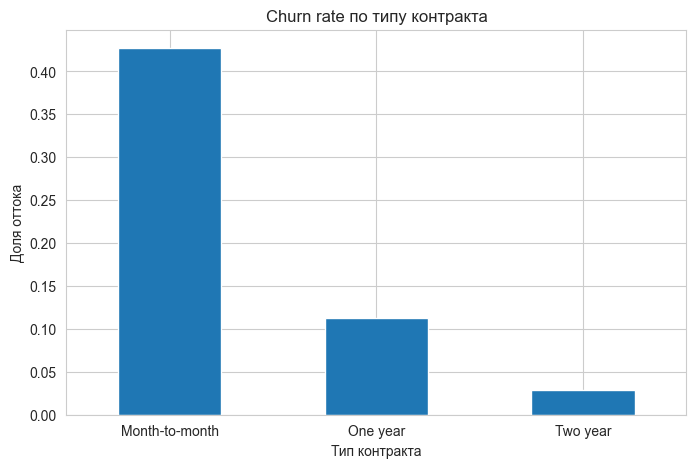

In [24]:
churn_by_contract = (
    pd.crosstab(df['Contract'], df['Churn'], normalize='index')['Yes']
    .sort_values(ascending=False)
)

plt.figure(figsize=(8, 5))
churn_by_contract.plot(kind='bar')
plt.title('Churn rate по типу контракта')
plt.ylabel('Доля оттока')
plt.xlabel('Тип контракта')
plt.xticks(rotation=0)
plt.show()


Наибольший уровень оттока наблюдается среди клиентов с помесячным контрактом, что визуально подтверждает его критическую роль в удержании клиентов.


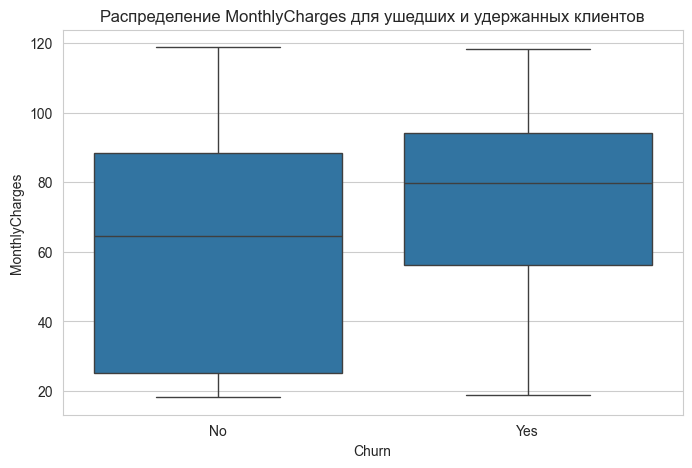

In [25]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Распределение MonthlyCharges для ушедших и удержанных клиентов')
plt.xlabel('Churn')
plt.ylabel('MonthlyCharges')
plt.show()


Ушедшие клиенты в среднем имеют более высокий уровень ежемесячных платежей, что указывает на чувствительность к цене.


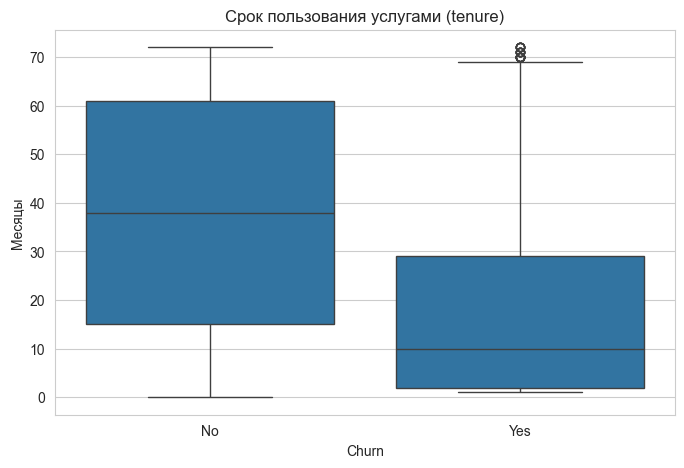

In [26]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Срок пользования услугами (tenure)')
plt.xlabel('Churn')
plt.ylabel('Месяцы')
plt.show()


Клиенты с коротким сроком пользования услугами значительно чаще покидают сервис, что подчёркивает важность раннего удержания.


## СОЗДАЁМ ФЛАГ РИСКА

In [28]:
df['high_risk'] = (
    (df['Contract'] == 'Month-to-month') &
    (df['MonthlyCharges'] > 70) &
    (df['tenure'] < 12)
)


In [29]:
df['high_risk'].value_counts()


high_risk
False    6229
True      814
Name: count, dtype: int64

In [30]:
pd.crosstab(df['high_risk'], df['Churn'], normalize='index')


Churn,No,Yes
high_risk,,
False,0.790817,0.209183
True,0.304668,0.695332


## Сегмент клиентов с высоким риском оттока

Был сформирован сегмент клиентов с повышенным риском оттока на основе следующих критериев:
- помесячный контракт
- высокий ежемесячный платёж
- срок пользования менее 12 месяцев

В данном сегменте уровень оттока значительно превышает средний по выборке, что подтверждает корректность выбранных критериев.


## ПРИОРИТИЗАЦИЯ

In [31]:
risk_share = df['high_risk'].mean()
risk_share


np.float64(0.11557574897060911)

Сегмент клиентов с высоким риском оттока составляет относительно небольшую долю от общей базы, что делает его приоритетной целью для точечных retention-кампаний.


## Выводы

В ходе анализа был выявлен ключевой сегмент клиентов с высоким риском оттока, который составляет около **11.6%** от всей клиентской базы.

При этом уровень оттока внутри данного сегмента достигает **69.5%**, что значительно превышает средний показатель по выборке.

Сфокусированные меры по удержанию данной группы клиентов могут дать непропорционально высокий эффект при относительно низких затратах.
